In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot as plt

In [2]:
num_words=500
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=num_words)

In [3]:
def vectorize_sequences(sequences, dimension):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1.0
    return result
x_train = vectorize_sequences(train_data, dimension=num_words)
x_test = vectorize_sequences(test_data, dimension=num_words)
y_train = np.array(train_labels).astype(np.float32)
y_test = np.array(test_labels).astype(np.float32)

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9352 - loss: 0.1757 - val_accuracy: 0.8042 - val_loss: 0.5674
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9395 - loss: 0.1689 - val_accuracy: 0.7931 - val_loss: 0.5923
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.1666 - val_accuracy: 0.8000 - val_loss: 0.5836
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9365 - loss: 0.1690 - val_accuracy: 0.7806 - val_loss: 0.6173
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.1693 - val_accuracy: 0.8021 - val_loss: 0.5940


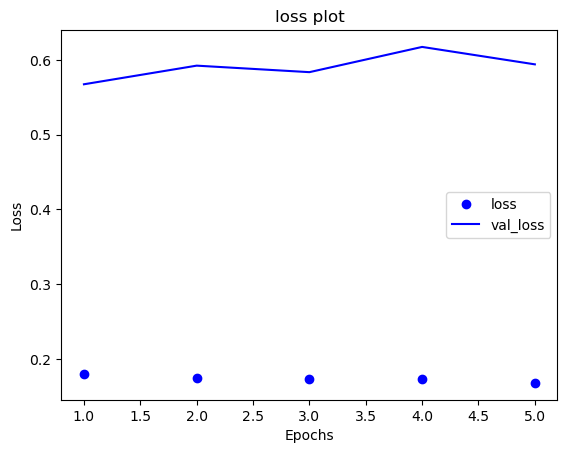

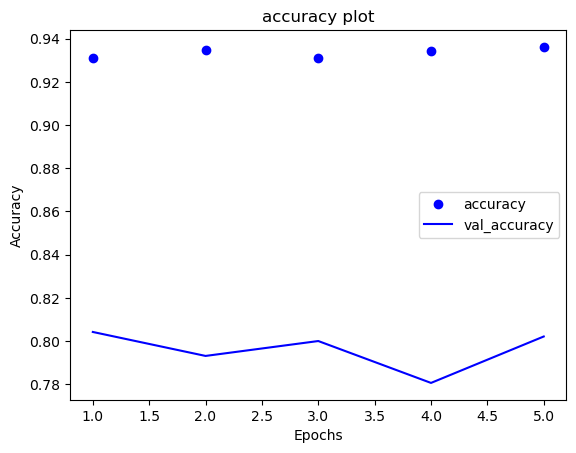

In [12]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(1, len(loss) + 1), loss, "bo", label="loss")
plt.plot(range(1, len(loss) + 1), val_loss, "b", label="val_loss")
plt.title("loss plot")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(range(1, len(acc) + 1), acc, "bo", label="accuracy")
plt.plot(range(1, len(acc) + 1), val_acc, "b", label="val_accuracy")
plt.title("accuracy plot")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()